<a href="https://colab.research.google.com/github/mahikshith/Langgraph/blob/main/Adding_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install langgraph langchain

In [2]:
from typing import Dict , TypedDict

from langgraph.graph import StateGraph   # design and manage flow of tasks in ur application usinf graph

## Single node - single input :

In [ ]:
# nodes pass information in the form of state

# state is in dict format

# state is data structure [shared] that keeps a track of everything as ur applcation runs

class AgentState(TypedDict) :
  message : str



# define node - node takes input as state and pass output as state [updated]

# need to add a doc string to expalin the functionality of the agent

def first_node(state : AgentState) -> AgentState :

  '''Simple node in the graph that just shows greet message to the state '''

  state["message"] = "Wasssup " + state["message"] + " how are u doing"

  return state


In [ ]:
# creating graph

gf = StateGraph(AgentState)

gf.add_node("wassup",first_node)

# need to add start and end point of the node

gf.set_entry_point("wassup")

gf.set_finish_point("wassup")

app = gf.compile()


In [ ]:
display(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'wassup': Node(id='wassup', name='wassup', data=wassup(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='wassup', data=None, conditional=False), Edge(source='wassup', target='__end__', data=None, conditional=False)])

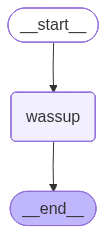

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
ans = app.invoke({"message" : "mykee"})

In [ ]:
ans

{'message': 'Wasssup mykee how are u doing'}

In [ ]:
ans["message"]   # reference the attribute

'Wasssup mykee how are u doing'

## Singel node - multiple input :

In [ ]:
from typing import List , TypedDict

In [ ]:
class stater(TypedDict) :  #  we can name it anyhting we want

  val : List[int]
  name : str
  res :str

In [ ]:
# node

# remember that state is a dict

def process_node(state : stater) -> stater :

  ''' this node process the info in the state and returns a result'''

  print(f"this is before : {state}")

  state["res"] = state["name"] + " , here is the sum of vals in the given list " + str(sum(state["val"]))

  print(f"this is after : {state}")



  return state

In [ ]:
# adding node to graph

gf = StateGraph(stater)

gf.add_node("process",process_node)

gf.set_entry_point("process")

gf.set_finish_point("process")

app = gf.compile()


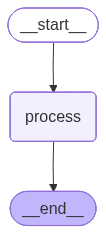

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
#  val : List[int]
#   name : str
#   res :str

ans = app.invoke({"val":[50,45,22,89], "name": "mykee"})

this is before : {'val': [50, 45, 22, 89], 'name': 'mykee'}
this is after : {'val': [50, 45, 22, 89], 'name': 'mykee', 'res': 'mykee , here is the sum of vals in the given list 206'}


In [ ]:
ans["res"]

'mykee , here is the sum of vals in the given list 206'

## Single node - multi input - if else :

In [ ]:
# if operation = "+" then add , if operation = "*" then multiply

# state

class operate(TypedDict) :

  val1 : List[int]
  strin : str
  operation : str
  result : str

In [ ]:
# node

import math

def noder(state : operate) -> operate :

  ''' thids node processes input via if-else'''

  if state["operation"] == "+" :

    state["result"] = f"Hey, {state["strin"]} the selected operator is sum and the value is : " + str(sum(state["val1"]))

  elif state["operation"] == "*":
    state["result"] = f"Hey,  {state["strin"]} the selected operator is multiplication and val is : " + str(math.prod(state["val1"]))

  else :
    state["result"] = "Invalid operation"

  return state


In [ ]:
# adding node to the state graph

gf = StateGraph(operate)

gf.add_node("operations",noder)

gf.set_entry_point("operations")

gf.set_finish_point("operations")

app = gf.compile()

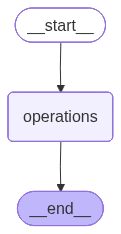

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
  # val1 : List[int]
  # strin : str
  # operation : str
  # result : str

r = input("enter a name: ")

k = input("enter the operation : [*] or [+]")

print("enter the number with spaces and then press enter")

li = list(map(int,input().split()))

ans = app.invoke({"val1":li,"strin":r, "operation": k})

enter a name: mykee
enter the operation : [*] or [+]*
enter the number with spaces and then press enter
1 2 3 4 5 6 7 8 9 10


In [ ]:
ans["result"]


'Hey,  mykee the selected operator is multiplication and val is : 3628800'

## multiple nodes : sequential  graph :

In [ ]:
# name , age , skills

class person(TypedDict) :   # state

  name : str

  age : int

  skills : list[str]

  result : str


# nodes


def first_node(state : person) -> person :

  ''' this first node greets user '''

  state["result"] = f"hello {state["name"]}  , welcome"

  return state

def second_node(state : person) -> person :

  ''' this second  node tells user  age '''

  state["result"] = state["result"] + f" you are {state["age"]}  years old "

  return state

def third_node(state : person) -> person :

  ''' this third   node tells user  their skills '''

  state["result"] = state["result"] + f"these are your skills {state["skills"]}  and keep improving them"

  return state



In [ ]:
# adding nodes to graph

gf = StateGraph(person)

gf.add_node("greet",first_node)
gf.add_node("age",second_node)
gf.add_node("skills",third_node)

gf.set_entry_point("greet")
gf.set_finish_point("skills")

gf.add_edge("greet","age")
gf.add_edge("age","skills")

app = gf.compile()

In [ ]:
name = input("enter your name : ")
age = int(input("enter your age : "))
skills = list(map(str,input("enter your skills : ").split()))

ans = app.invoke({"name":name,"age":age,"skills":skills})


enter your name : mykee
enter your age : 25
enter your skills : py sql lang mL dL sql


In [ ]:
ans["result"]

"hello mykee  , welcomeyou are 25  years old these are your skills ['py', 'sql', 'lang', 'mL', 'dL', 'sql']  and keep improving them"

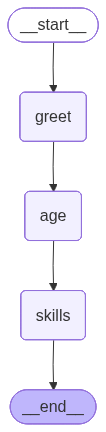

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

## conditional node :

In [ ]:
# implement conditional node

from typing import TypedDict

from langgraph.graph import StateGraph, START, END

In [ ]:
# define state

class condit(TypedDict) :

  number1 : int

  number2 : int

  operate : str

  result : int

In [ ]:
# define nodes  :

def add(state : condit) -> condit :

  ''' this node adds two numbers'''

  state["result"] = state["number1"] + state["number2"]


  return state

def sub(state : condit) -> condit :

  ''' this node subtracts two numbers'''

  state["result"] = state["number1"] - state["number2"]

  return state

# conditional node

def decide(state : condit) -> condit :   # this needs to return edges rather than state

  ''' this node routes the edges to select the nodes'''

  if state["operate"] == "+" :

    return "add_edge"

  elif state["operate"] == "-" :

    return "sub_edge"

In [ ]:
# graph

gf = StateGraph(condit)

gf.add_node("add_node",add)
gf.add_node("sub_node",sub)
gf.add_node("router",lambda state: state)  # acting like a pass through

gf.add_edge(START,"router")

gf.add_conditional_edges("router",decide,

                         {"add_edge" : "add_node",  # edge : node
                          "sub_edge" : "sub_node"})
gf.add_edge("add_node",END)
gf.add_edge("sub_node",END)

# gf.compile()



In [ ]:
app = gf.compile()

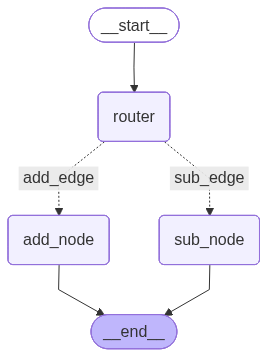

In [ ]:
app

In [ ]:
ans  = app.invoke({"number1":10, "number2":15,"operate" :"+"})

In [ ]:
ans["result"]

25

In [ ]:
intail  =condit(number1 = 22 , number2 = 130 , operate = "+")

app.invoke(intail)

{'number1': 22, 'number2': 130, 'operate': '+', 'result': 152}

## double conditional node :

In [3]:
from typing import TypedDict

from langgraph.graph import START,END,StateGraph

In [4]:
class doubleroute(TypedDict) :  # define state

  number1 : int
  operation1 : str

  number2 : int

  number3 : int

  operation2 : str


  result1 : int

  result2 : int

In [5]:
# define nodes

def add1(state : doubleroute) -> doubleroute :

  ''' this node adds two nums'''

  print("adder node 1")

  state["result1"] = state["number1"] + state["number2"]

  return state

def sub1(state : doubleroute) -> doubleroute :


  ''' this node subs  two nums'''

  print("sub node 1")

  state["result1"] = state["number1"] - state["number2"]

  return state

def decide1(state : doubleroute) -> doubleroute :  # condotional nodes return edges rather than state


  ''' this node routes the  nodes'''

  if state["operation1"] == "+" :

    return "add1_edge"

  elif state["operation1"] == "-" :

    return "sub1_edge"



def add2(state : doubleroute) -> doubleroute :

  ''' this node adds two nums from the previous result'''

  print("adder node 2")

  state["result2"] = state["result1"] + state["number3"]

  return state

def sub2(state : doubleroute) -> doubleroute :


  ''' this node subs  two nums from the previous result'''

  print("subber node 2")

  state["result2"] = state["result1"] - state["number3"]

  return state

def decide2(state : doubleroute) -> doubleroute :  # condotional nodes return edges rather than state


  ''' this node routes the  nodes'''

  if state["operation2"] == "+" :

    return "add2_edge"

  elif state["operation2"] == "-" :

    return "sub2_edge"




In [ ]:
# graph

gf = StateGraph(doubleroute)

gf.add_node("adder_node",add1)
gf.add_node("subber_node",sub1)

gf.add_node("adder_node2",add2)
gf.add_node("subber_node2",sub2)

gf.add_node("router1",lambda state: state)  # acting like a pass through [creating router node]

gf.add_node("router2",lambda state: state)

gf.add_edge(START,"router1")

gf.add_conditional_edges("router1",decide1, # edge : node

                         {"add1_edge" : "adder_node",
                          "sub1_edge" : "subber_node"})


gf.add_edge("adder_node","router2")
gf.add_edge("subber_node","router2")

gf.add_conditional_edges("router2",decide2,
                         # edge : node
                         {"add2_edge" : "adder_node2",
                          "sub2_edge" : "subber_node2"})

gf.add_edge("adder_node2",END)
gf.add_edge("subber_node2",END)


app = gf.compile()


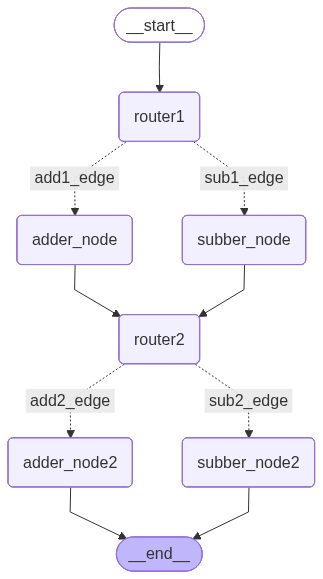

In [ ]:
app

In [ ]:
intial = doubleroute(number1 = 10, operation1 = "+", number2 = 15, number3 = 20, operation2 = "+")

ans = app.invoke(intial)


adder node 1
adder node 2


In [ ]:
ans["result2"]

45

In [ ]:
rap = doubleroute(number1 = 10, operation1 = "+", number2 = 15, number3 = 20, operation2 = "-")

ans = app.invoke(rap)

adder node 1
subber node 2


In [ ]:
ans["result2"]

5

## looping node :

In [7]:
from typing import List

from langgraph.graph import START,END,StateGraph

In [38]:
import random

class looper(TypedDict) :

  name : str

  ra_li : List[int]

  counter : int


# node

def normal(state : looper) -> looper :

  ''' this node just greets'''

  state["name"] = f"hello {state["name"]}"

  state["counter"] = 0

  return state

def random_node(state : looper) -> looper :

  ''' this node generates random numbers'''

  state["ra_li"].append(random.randint(0,200))


  state["counter"] = state["counter"] + 1

  return state

def conditional_loop(state : looper) -> looper :

  # this is conditional edge - returns edges not state

  if state["counter"] < 10 and len(state["ra_li"])<=10:
    # len(state["ra_li"])<=10 if u remove this then when ever u invoke ra_li gets appeneded with new randm numbers

    return "random_edge"

  else :

     return "exit"

In [39]:
# graph
gf = StateGraph(looper)

gf.add_node("normal_node",normal)
gf.add_node("random_node",random_node)

# conditional edge : source , action

gf.add_conditional_edges("random_node",conditional_loop,
                         {"random_edge":"random_node",
                          "exit"  :END} )

gf.add_edge(START,"normal_node")
gf.add_edge("normal_node","random_node")

gf.set_entry_point("normal_node")

app = gf.compile()


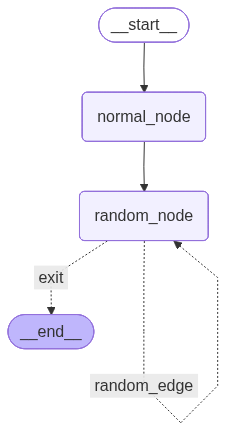

In [40]:
app

In [46]:
xp = looper(name="mykee",ra_li=[],counter=-100)

In [47]:
ans = app.invoke(xp)

In [48]:
ans

{'name': 'hello mykee',
 'ra_li': [156, 69, 1, 29, 43, 8, 39, 179, 117, 93],
 'counter': 10}

## Lopper - guesser :

In [50]:
# state

class guessit(TypedDict):
  name : str
  target_number : int
  guesses : List[int]
  attempts : int
  hint : str
  lower_bound : int
  upper_bound : int




In [51]:
import random

### Solve this later --> [there should be no human intervention in this loop  u need to loop the node]

In [ ]:
# nodes

def setup_node(state : guessit) -> guessit :

  ''' this node setsup the problem '''

  state["name"] = input("hello please enter your name : ")

  state["target_number"] = random.randint(0,20)

  state["guesses"] = []

  state["attempts"] = 0

  state["lower_bound"] = 0

  state["upper_bound"] = 20

  print(f"{state["name"]} has started guessing the number between 0 and 20")

  return state


def guesser_node(state : guessit) -> guessit :

  ''' this node takes guess from user and checks against the number  '''

  guess = int(input("enter your guess between 0 and 20: "))

  state["guesses"].append(guess)

  state["attempts"] = state["attempts"] + 1

## Includign LLMS into graph structure :

In [59]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


In [54]:
from google.colab import userdata
api = userdata.get('lang_graph')  # gettign api key from colab env

In [60]:
from langgraph.graph import StateGraph , START , END

from typing import TypedDict , List

from langchain_core.messages import HumanMessage

from langchain_google_genai import ChatGoogleGenerativeAI


In [78]:
# state

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite",api_key=api,max_tokens=170)

class llm_state(TypedDict) :

  message : List[HumanMessage]


def request_process(state : llm_state) -> llm_state :

  resp = llm.invoke(state["message"])

  print(f" response by ai : {resp.content}")

  return state



In [79]:
# graph

gf = StateGraph(llm_state)

gf.add_node("rq_process",request_process)

gf.add_edge(START,"rq_process")

gf.add_edge("rq_process",END)

app = gf.compile()

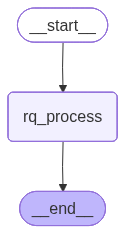

In [80]:
app

In [82]:
# taking input from user :

inp = input("enter ur message : ")


while True :

  if inp.lower() == "exit" :

    print("end of our journey bye :> ")

    break

  hum_msg = HumanMessage(content=inp)

  intial = llm_state(message=[hum_msg])

  ans = app.invoke(intial)

  inp = input("enter ur message : ")




enter ur message : how many holy knight are there in onepiece and who are they 
 response by ai : There are **no Holy Knights** in the world of One Piece.

The term "Holy Knight" is primarily associated with the anime and manga series **The Seven Deadly Sins**.

In One Piece, the closest equivalent to a powerful, religiously-motivated military order would be characters who hold significant authority and often act with a strong sense of justice or righteousness, but they don't operate under the banner of "Holy Knights." Examples of such characters and groups include:

*   **The World Nobles (Celestial Dragons):** While not "knights," they are at the top of the World Government and are considered divine by many. They wield immense power and influence, and their actions are often seen as righteous by their followers.
*   **The Marines:** The primary military force of the World Government. They have ranks and a hierarchical
enter ur message : exit
end of our journey bye :> 
